In [85]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
import warnings 
warnings.filterwarnings("ignore")

In [14]:
from sklearn.datasets import load_iris

In [15]:
iris = load_iris()

In [16]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [17]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [24]:
df= pd.DataFrame(iris.data , columns=iris.feature_names)

In [25]:
df.sample(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
30,4.8,3.1,1.6,0.2
49,5.0,3.3,1.4,0.2
42,4.4,3.2,1.3,0.2


In [26]:
df["target"]= iris.target

In [29]:
df.shape

(150, 5)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [34]:
df0 = df[df['target']==0]
df1 = df[df['target']==1]
df2 = df[df['target']==2]


Text(0.5, 1.0, 'Sepal distribution')

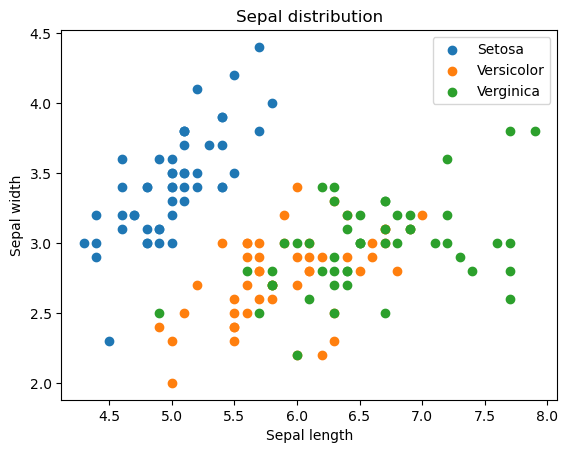

In [59]:
plt.scatter(df0["sepal length (cm)"] , df0["sepal width (cm)"], label="Setosa")
plt.scatter(df1["sepal length (cm)"] , df1["sepal width (cm)"], label="Versicolor")
plt.scatter(df2["sepal length (cm)"] , df2["sepal width (cm)"], label="Verginica")
plt.legend()
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.title("Sepal distribution")

Text(0.5, 1.0, 'petal distribution')

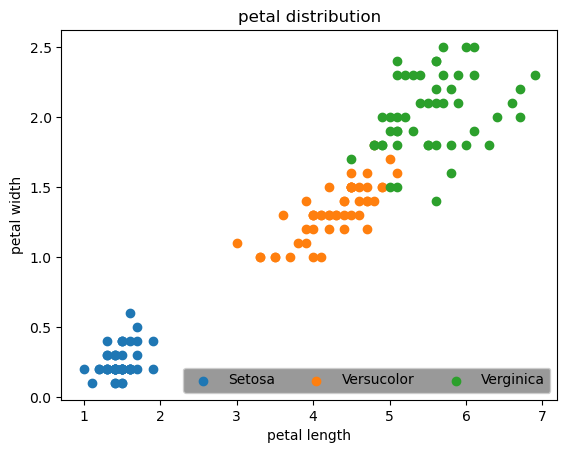

In [66]:
plt.scatter(df0["petal length (cm)"] , df0["petal width (cm)"], label="Setosa")
plt.scatter(df1["petal length (cm)"] , df1["petal width (cm)"], label="Versucolor")
plt.scatter(df2["petal length (cm)"] , df2["petal width (cm)"], label="Verginica")
plt.legend(loc="lower right" , ncol=3 , facecolor="gray")
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.title("petal distribution")

In [67]:
X = df.drop("target",axis=1)

In [69]:
y=df["target"]

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [77]:
from sklearn.neighbors import KNeighborsClassifier

In [78]:
model = KNeighborsClassifier(n_neighbors=3)

In [79]:
model.fit(X_train , y_train)

KNeighborsClassifier(n_neighbors=3)

In [80]:
model.score(X_test , y_test)

1.0

In [81]:
y_pred = model.predict(X_test)

In [86]:
model.predict([[4.5,3.5,3,3]])

array([1])

In [88]:
score=[]
for i in range(1,15):
    model= KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train , y_train)
    accuracy = model.score(X_test , y_test)
    score.append(accuracy)
score

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9666666666666667,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

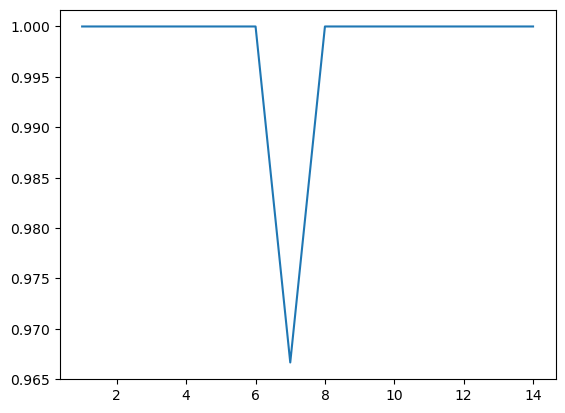

In [90]:
plt.plot(range(1,15) , score)
plt.show()

In [91]:
import seaborn as sns

In [93]:
cm=confusion_matrix(y_test, y_pred)

In [94]:
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

<Axes: >

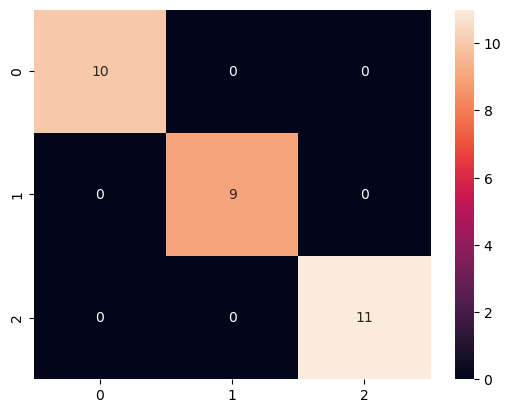

In [95]:
sns.heatmap(cm , annot=True)

In [96]:
 from sklearn.metrics import classification_report

In [98]:
print(classification_report (y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

